Dataset from Kaggle: https://www.kaggle.com/datasets/mrmars1010/banana-quality-dataset/data?select=banana_quality_dataset.csv

Description of Project: Using the banana quality dataset linked above that we found on Kaggle, we wanted to analyze the correlation between the different features of a banana, such as its ripeness, sugar content, length, the region it was harvested in, etc. and its quality.

After conducting EDA and crafting data visualizations to better understand our data, we:
- created new features with PCA and other basic feature engineering processes
- cleaned up and encoded the categorical data
- made a regression model (near the end of the notebook file) to predict a banana's quality score (y = quality_score)
- made a classification model to accurately classify a banana's quality category (y = quality_category)

Note: Most of the visualizations were made to be banana-themed :D

In [ ]:
# import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# import all specific packages and functions from scikitlearn
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Load in dataset (dataset must be first downloaded and uploaded to google collab for this cell to run)
banana_df = pd.read_csv('/content/banana_quality_dataset.csv')

In [ ]:
banana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

In [ ]:
banana_df.nunique()

,0
sample_id,1000
variety,8
region,8
quality_score,234
quality_category,4
ripeness_index,481
ripeness_category,4
sugar_content_brix,540
firmness_kgf,401
length_cm,790


###EDA: Visualizations & Initial Data Analysis

Ripeness Index vs. Quality Score

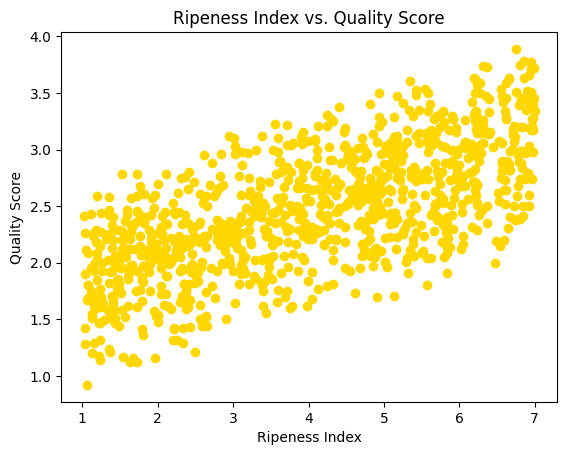

In [ ]:
plt.scatter(banana_df['ripeness_index'], banana_df['quality_score'], color='gold')
plt.title('Ripeness Index vs. Quality Score')
plt.xlabel('Ripeness Index')
plt.ylabel('Quality Score')
plt.show()

Linear Regression: Predicting Quality Score from Ripeness Index

In [ ]:
regression_model = linear_model.LinearRegression()
regression_model.fit(X = pd.DataFrame(banana_df['ripeness_index']), y = banana_df['quality_score'])

LinearRegression()

In [ ]:
print(regression_model.intercept_)

print(regression_model.coef_)

1.6174029878172358
[0.20972819]


Text(0.5, 1.0, 'Simple Linear Regression: Model Fit')

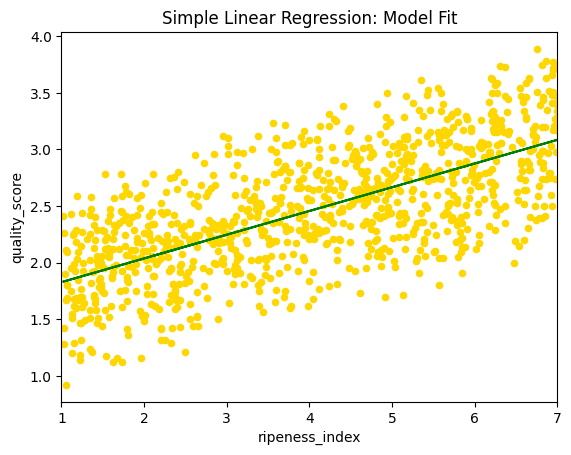

In [ ]:
train_prediction = regression_model.predict(X = pd.DataFrame(banana_df['ripeness_index']))
banana_df.plot(kind="scatter",
           x="ripeness_index",
           y="quality_score",
           color="gold",
           xlim = (1,7))

# Plot regression line
plt.plot(banana_df['ripeness_index'],      # Explanitory variable
         train_prediction,  # Predicted values
         color="green")

plt.title('Simple Linear Regression: Model Fit')

####Histograms To Analyze Distribution of Data

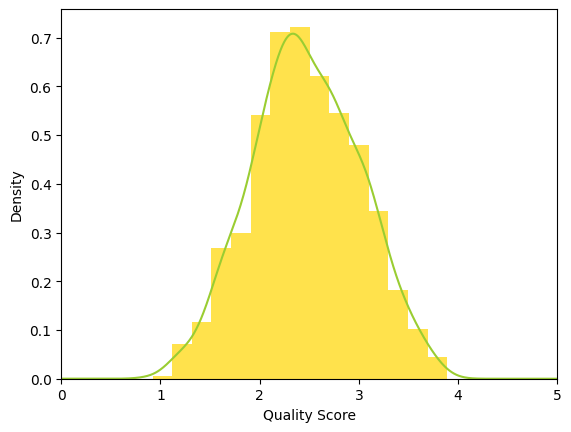

In [ ]:
#Histogram showing the distribution of quality score of the dataset
quality_plot = banana_df['quality_score'].hist(bins=15, density=True, stacked=True, color='gold', alpha=0.7)
banana_df['quality_score'].plot(kind='density', color = 'yellowgreen')
quality_plot.set(xlabel='Quality Score')
plt.xlim(0, 5)
plt.show()

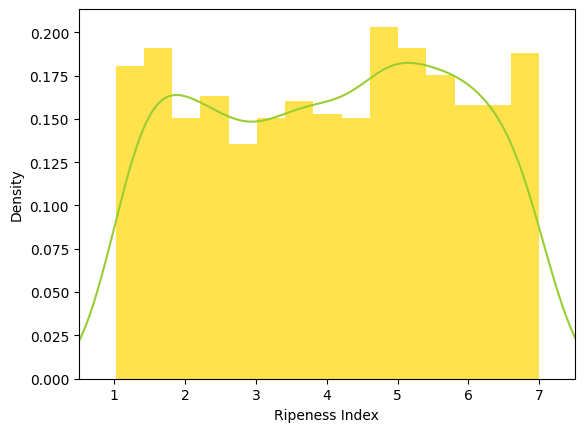

In [ ]:
#Historgram showing the distribtuion of the Ripeness Index: Spread out values from 1-7
ripe_plot = banana_df['ripeness_index'].hist(bins=15, density=True, stacked=True, color='gold', alpha=0.7)
banana_df['ripeness_index'].plot(kind='density', color = 'yellowgreen')
ripe_plot.set(xlabel='Ripeness Index')
plt.xlim(0.5, 7.5)
plt.show()

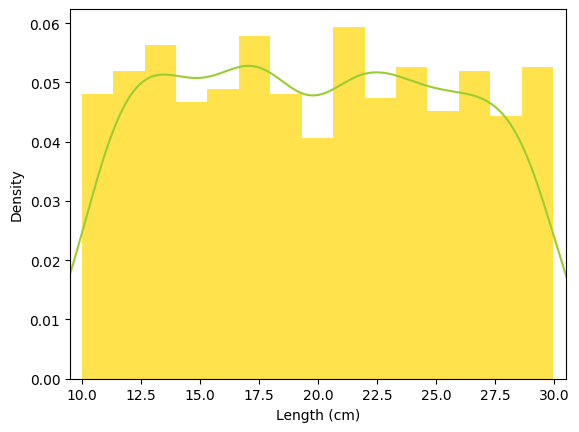

In [ ]:
#Historgram showing the distribtuion of the length: Spread out values from 10-30
length_plot = banana_df['length_cm'].hist(bins=15, density=True, stacked=True, color='gold', alpha=0.7)
banana_df['length_cm'].plot(kind='density', color = 'yellowgreen')
length_plot.set(xlabel='Length (cm)')
plt.xlim(9.5, 30.5)
plt.show()

#### Heatmaps

,sample_id,quality_score,ripeness_index,sugar_content_brix,firmness_kgf,length_cm,weight_g,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
sample_id,1.000000,-0.012476,-0.038825,0.015799,-0.003484,0.013642,0.016341,0.006301,-0.028854,-0.006547,-0.023268
quality_score,-0.012476,1.000000,0.679778,0.602842,-0.067945,0.439203,-0.014571,0.022158,0.005179,0.011419,-0.039381
ripeness_index,-0.038825,0.679778,1.000000,0.027318,-0.005850,0.032862,0.030081,0.042175,0.050076,0.003166,-0.065418
sugar_content_brix,0.015799,0.602842,0.027318,1.000000,-0.013572,-0.008925,-0.020328,-0.028472,-0.046773,-0.005169,0.013128
firmness_kgf,-0.003484,-0.067945,-0.005850,-0.013572,1.000000,-0.044788,0.040061,-0.016933,-0.022841,0.025458,0.004460
length_cm,0.013642,0.439203,0.032862,-0.008925,-0.044788,1.000000,-0.055880,0.020556,-0.008890,0.028341,0.005156
weight_g,0.016341,-0.014571,0.030081,-0.020328,0.040061,-0.055880,1.000000,0.007971,0.012290,-0.031945,-0.002808
tree_age_years,0.006301,0.022158,0.042175,-0.028472,-0.016933,0.020556,0.007971,1.000000,0.038132,0.001233,0.013124
altitude_m,-0.028854,0.005179,0.050076,-0.046773,-0.022841,-0.008890,0.012290,0.038132,1.000000,-0.049308,-0.008828
rainfall_mm,-0.006547,0.011419,0.003166,-0.005169,0.025458,0.028341,-0.031945,0.001233,-0.049308,1.000000,0.017463


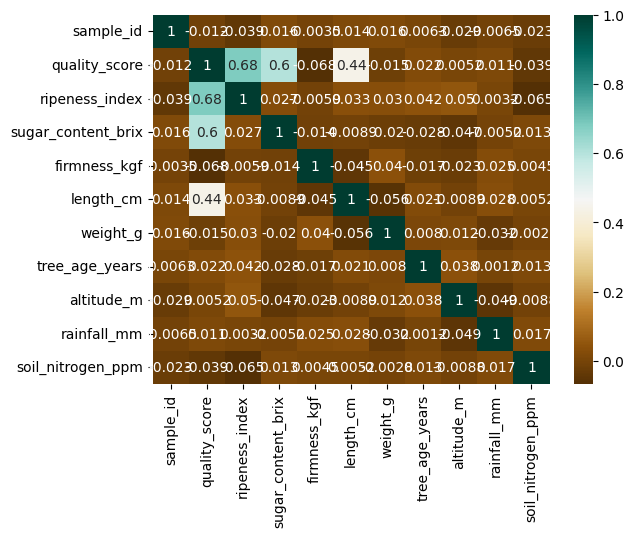

In [ ]:
#Heatmap of the dataset, using all data, which isn't ideal, since a lot of it has no correlation

c = banana_df.select_dtypes(include='number').corr()

sns.heatmap(c,cmap="BrBG",annot=True)

c

,quality_score,ripeness_index,sugar_content_brix,firmness_kgf,length_cm
quality_score,1.000000,0.679778,0.602842,-0.067945,0.439203
ripeness_index,0.679778,1.000000,0.027318,-0.005850,0.032862
sugar_content_brix,0.602842,0.027318,1.000000,-0.013572,-0.008925
firmness_kgf,-0.067945,-0.005850,-0.013572,1.000000,-0.044788
length_cm,0.439203,0.032862,-0.008925,-0.044788,1.000000


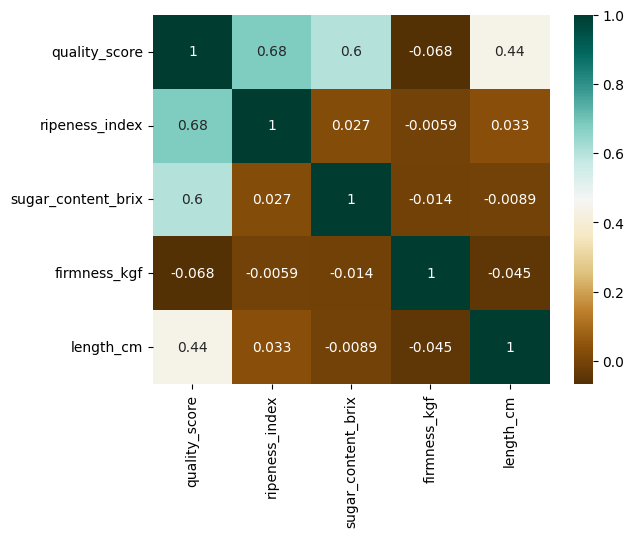

In [ ]:
#Heatmap of the dataset, with reasonable correlations

c = banana_df[["quality_score","ripeness_index", "sugar_content_brix", "firmness_kgf", "length_cm"]].select_dtypes(include='number').corr()

sns.heatmap(c,cmap="BrBG",annot=True)

c

#### Other Visualizations

In [ ]:
# calculating averages by quality category
cat_avgs = banana_df.groupby(
    ['quality_category']
    ).agg(
        mean_firmness = ('firmness_kgf', 'mean'),
        mean_sugar = ('sugar_content_brix', 'mean'),
        mean_ripeness = ('ripeness_index', 'mean'),
        mean_tree_age = ('tree_age_years', 'mean'),
    )

order_list = [1, 0, 2, 3]
order_s = pd.Series(order_list)
cat_avgs = cat_avgs.assign(order=order_s.values)

cat_avgs = cat_avgs.sort_values(by = 'order')

cat_avgs

,mean_firmness,mean_sugar,mean_ripeness,mean_tree_age,order
quality_category,,,,,
Premium,2.912000,21.136400,6.522800,11.300000,0
Good,2.616429,19.514839,5.048571,11.063364,1
Processing,2.755217,17.713458,3.213953,10.687352,2
Unripe,2.982000,15.884857,1.764571,11.080000,3


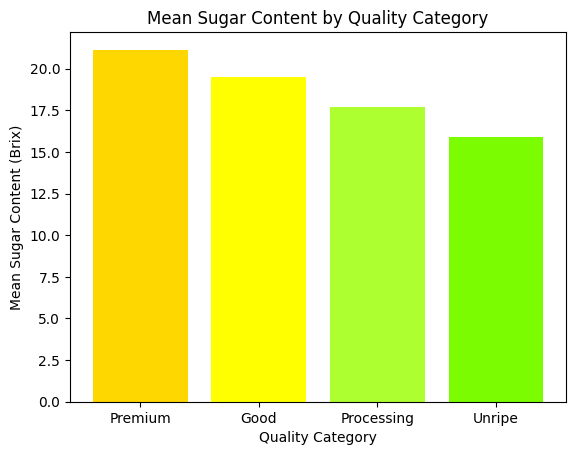

In [ ]:
# bar chart for visualizing correlation between sugar content of a banana and its quality for classification

quality_cat_list = ['Premium', 'Good', 'Processing', 'Unripe']

bar_colors = ['gold', 'yellow', 'greenyellow', 'lawngreen']

plt.bar(x = quality_cat_list, height = cat_avgs['mean_sugar'], width = 0.8, color = bar_colors)
plt.title('Mean Sugar Content by Quality Category')
plt.xlabel('Quality Category')
plt.ylabel('Mean Sugar Content (Brix)')
plt.show()

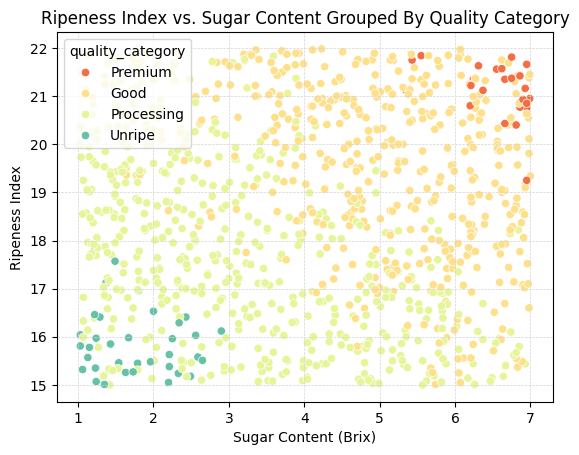

In [ ]:
# scatterplot: ripeness_index and sugar_content_brix
sns.scatterplot(data = banana_df, x = 'ripeness_index', y = 'sugar_content_brix',
                hue = 'quality_category', hue_order = ['Premium', 'Good', 'Processing', 'Unripe'] ,
                palette = 'Spectral')

plt.xlabel("Sugar Content (Brix)")
plt.ylabel("Ripeness Index")
plt.title("Ripeness Index vs. Sugar Content Grouped By Quality Category")
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

<ipython-input-17-0dff167457a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = banana_df, x = 'quality_score', y = 'ripeness_category', order=order, palette = "YlOrBr")


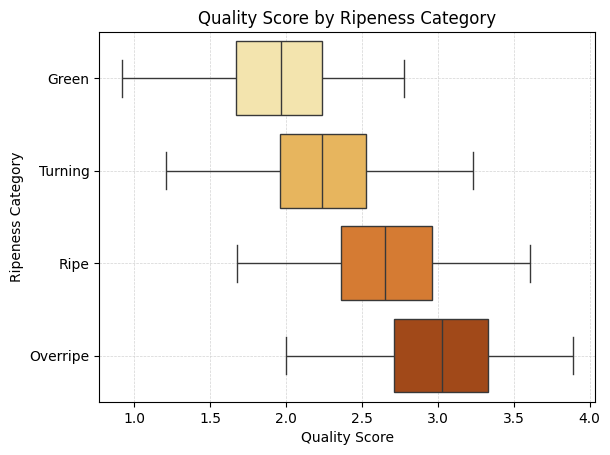

In [ ]:
# box plot to visualize differences in quality score between each ripeness category
order = ['Green', 'Turning', 'Ripe', 'Overripe']
sns.boxplot(data = banana_df, x = 'quality_score', y = 'ripeness_category', order=order, palette = "YlOrBr")

plt.title("Quality Score by Ripeness Category")
plt.xlabel("Quality Score")
plt.ylabel("Ripeness Category")
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

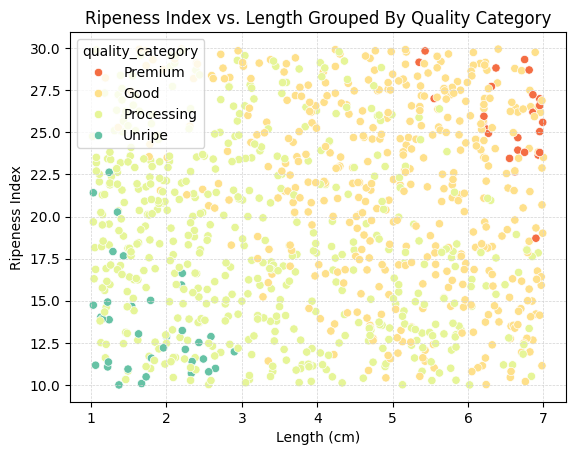

In [ ]:
# scatterplot: ripeness_index and length_cm
sns.scatterplot(data = banana_df, x = 'ripeness_index', y = 'length_cm',
                hue = 'quality_category', hue_order = ['Premium', 'Good', 'Processing', 'Unripe'] ,
                palette = 'Spectral')

plt.xlabel("Length (cm)")
plt.ylabel("Ripeness Index")
plt.title("Ripeness Index vs. Length Grouped By Quality Category")
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

### Feature Engineering

In [ ]:
# principal component analysis - applying pca and extracting the loadings

pca_features = ['ripeness_index', 'sugar_content_brix', 'length_cm', 'weight_g']

X = banana_df.copy()
y = X.pop('quality_score')
X = X.loc[:, pca_features]

# standardize X
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, columns = component_names)

# extract loadings
loadings = pd.DataFrame(pca.components_.T, columns = component_names, index = X.columns)
loadings

,PC1,PC2,PC3,PC4
ripeness_index,0.140037,0.811744,-0.283865,-0.490797
sugar_content_brix,0.194719,0.448353,0.807553,0.330033
length_cm,0.700048,0.066717,-0.435508,0.561974
weight_g,-0.672612,0.368239,-0.278588,0.578257


In [ ]:
# principal component analysis - creating new features based on results

# PC1: Length & Weight
banana_df["weight_length_ratio"] = banana_df['weight_g'] / banana_df['length_cm']

In [ ]:
# create feature for relationship between ripeness_index and sugar_content_brix
banana_df["ripeness_sugar_product"] = banana_df['ripeness_index'] * banana_df['sugar_content_brix']

In [ ]:
X = banana_df.copy()
y = X.pop("quality_score")
X = X.drop("quality_category", axis=1)

# label encoding for categoricals
for colname in X.select_dtypes("object"):
  X[colname], _ = X[colname].factorize()

# use mutual info regression to get mi scores
mi_scores = mutual_info_regression(X, y, discrete_features = 'auto')
mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns).sort_values(ascending = False)

# print out all values
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', '{:.6f}'.format)

mi_scores

,MI Scores
ripeness_sugar_product,0.543213
ripeness_index,0.321628
ripeness_category,0.279773
sugar_content_brix,0.272758
length_cm,0.137241
weight_length_ratio,0.071569
firmness_kgf,0.040174
weight_g,0.032374
rainfall_mm,0.026110
harvest_date,0.025146


### Data Cleaning

In [ ]:
banana_df = banana_df.drop(['harvest_date', 'sample_id', 'tree_age_years'], axis=1)

### **Regression Model:** Using Linear Regression to Predict Quality Score of a Banana

####**Regression:** Splitting the Data into Testing and Training sub data-sets

In [ ]:
X = banana_df.copy()
X = X.drop(columns = ['quality_score', 'quality_category'])
y1 = banana_df['quality_score']
y2 = banana_df['quality_category']

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y1, test_size=0.2, random_state=100)

####**Regression:** Handling Missing Values

In [ ]:
X_train.isnull().sum()

,0
variety,0
region,0
ripeness_index,0
ripeness_category,0
sugar_content_brix,0
firmness_kgf,0
length_cm,0
weight_g,0
altitude_m,0
rainfall_mm,0


In [ ]:
# No missing values: Do not need to handle missing values

####**Regression:** Encoding Categorical Variables

In [ ]:
categorical_features = X_train.select_dtypes(include = ['object']).columns.tolist()

# use pd.get_dummies to encode categorical variables
X_train = pd.get_dummies(X_train, columns = categorical_features, dtype = int)
X_test = pd.get_dummies(X_test, columns = categorical_features, dtype = int)

X_train.head()

,ripeness_index,sugar_content_brix,firmness_kgf,length_cm,weight_g,altitude_m,rainfall_mm,soil_nitrogen_ppm,weight_length_ratio,ripeness_sugar_product,...,region_Costa Rica,region_Ecuador,region_Guatemala,region_Honduras,region_India,region_Philippines,ripeness_category_Green,ripeness_category_Overripe,ripeness_category_Ripe,ripeness_category_Turning
675,2.830000,17.010000,1.760000,27.730000,85.680000,866.800000,1651.000000,120.200000,3.089794,48.138300,...,1,0,0,0,0,0,0,0,0,1
358,2.660000,18.740000,4.200000,21.430000,225.060000,295.700000,1103.400000,172.300000,10.502100,49.848400,...,0,0,0,0,0,0,0,0,0,1
159,1.180000,20.240000,1.820000,21.310000,118.380000,871.500000,2566.600000,86.300000,5.555138,23.883200,...,0,0,0,0,0,0,1,0,0,0
533,2.640000,15.100000,1.850000,16.130000,215.150000,750.300000,2574.700000,170.500000,13.338500,39.864000,...,1,0,0,0,0,0,0,0,0,1
678,2.040000,15.780000,4.110000,23.580000,201.080000,110.300000,2067.500000,106.400000,8.527566,32.191200,...,0,0,0,0,0,0,0,0,0,1


####**Regression:** Preparing Model for Training / Fitting

In [ ]:
# initialize logistic regression model
reg_model = LinearRegression()

# fit model with training data
reg_model.fit(X = X_train, y = y_train)

LinearRegression()

In [ ]:
# predict target variable with model using training data
train_pred = reg_model.predict(X_train)

In [ ]:
# getting mean absolute error, comparing predictions with y_train
initial_mae = mean_absolute_error(train_pred, y_train)
print(initial_mae)

0.05693476334071551


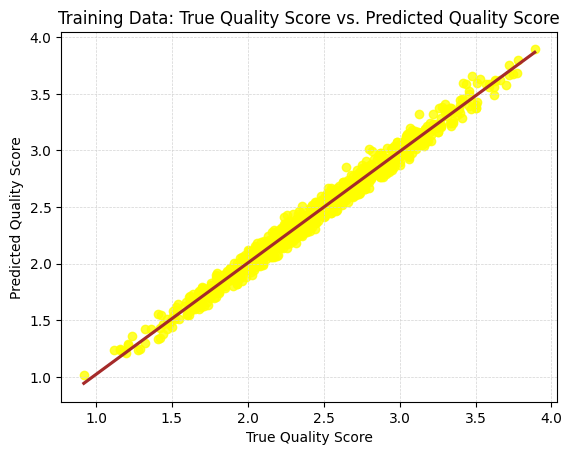

In [ ]:
# scatterplot of quality scores with training data

sns.regplot(x = y_train, y = train_pred, color="brown", scatter_kws={"color": "yellow"})

plt.xlabel("True Quality Score")
plt.ylabel("Predicted Quality Score")
plt.title("Training Data: True Quality Score vs. Predicted Quality Score")
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

####**Regression**: Using Model on Testing Data and Getting Final Predictions

In [ ]:
# predict target variable with model using testing data
test_pred = reg_model.predict(X_test)

In [ ]:
# getting mean absolute error, comparing predictions with y_train
test_mae = mean_absolute_error(test_pred, y_test)
print("Mean Absolute Error of Regression Model:", test_mae)

Mean Absolute Error of Regression Model: 0.05668305051601469


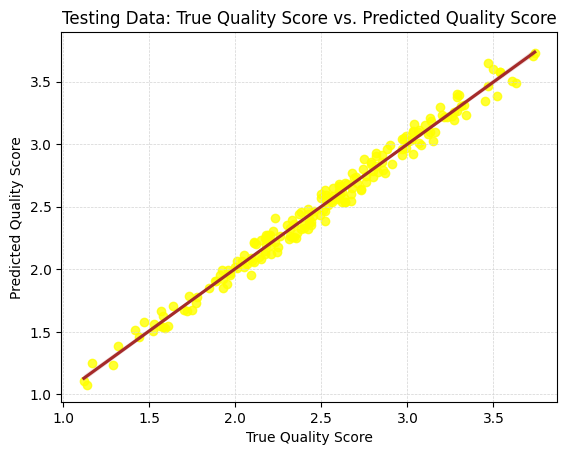

In [ ]:
# scatterplot of quality scores, comparing true quality scores for test data with predicted quality scores

sns.regplot(x = y_test, y = test_pred, color="brown", scatter_kws={"color": "yellow"})

plt.xlabel("True Quality Score")
plt.ylabel("Predicted Quality Score")
plt.title("Testing Data: True Quality Score vs. Predicted Quality Score")
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

In [ ]:
results_reg = LinearRegression()
results_reg.fit(pd.DataFrame(y_test), pd.DataFrame(test_pred))

# Get the coefficients
slope = results_reg.coef_[0]
intercept = results_reg.intercept_

# Print the regression equation
print(slope)
print(intercept)

[0.99465275]
[0.01540552]


### **Classification Model:** Using Random Forest Classification to Predict Quality Category of a Banana

####**Classification:** Splitting the Data into Testing and Training sub data-sets

In [ ]:
# resplit data with categorical target variable for classification
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y2, test_size=0.2, random_state=101)

####**Classification:** Encoding Categorical Variables

In [ ]:
categorical_features = X_train.select_dtypes(include = ['object']).columns.tolist()

# use pd.get_dummies to encode categorical variables
X_train = pd.get_dummies(X_train, columns = categorical_features, dtype = int)
X_test = pd.get_dummies(X_test, columns = categorical_features, dtype = int)

X_train.head()

####**Classification:** Preparing Model for Training / Fitting

In [ ]:
# initializing random forest classification
clf_model = RandomForestClassifier(n_estimators = 100, random_state = 1)

# fit model with training data
clf_model.fit(X_train, y_train)

####**Classification:** Using model on testing data and getting final results

In [ ]:
# making predictions on test data with trained model
test_pred = clf_model.predict(X_test)

In [ ]:
# getting mean absolute error, comparing predictions with y_train
train_acc = accuracy_score(y_test, test_pred)
print("Accuracy of Classification Model:", train_acc)

In [ ]:
# initialize list of categories
qual_cat_list = ['Unripe', 'Processing', 'Good', 'Premium']

# visualize comparison between predicted labels and true labels with a confusion matrix
plt.figure(figsize = (8,6))
s = sns.heatmap(confusion_matrix(y_test, test_pred, labels = qual_cat_list), annot=True, fmt="d", cmap="YlOrBr", cbar=True, xticklabels = qual_cat_list, yticklabels = qual_cat_list)

# title and labels
s.set(xlabel='True Labels', ylabel='Predicted Labels')
plt.title("Confusion Matrix for Classification Model")

In [ ]:
y_test.value_counts() # there isnt't much data for the "unripe" and "premium" categories hence why confusion matrix only shows correlation for "good" and "processing"